# TASK - FITNESS TRENDS DATASET

### Importing the Necessary Modules and Functions

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

### Importing Dataset

The dataset used in this python notebook is procured from Kaggle. The dataset can be found at https://www.kaggle.com/aroojanwarkhan/fitness-data-trends. 

In [2]:
df = pd.read_csv('Fitness.csv')
df

,date,step_count,mood,calories_burned,hours_of_sleep,bool_of_active,weight_kg
0,2017-10-06,5464,200,181,5,0,66
1,2017-10-07,6041,100,197,8,0,66
2,2017-10-08,25,100,0,5,0,66
3,2017-10-09,5461,100,174,4,0,66
4,2017-10-10,6915,200,223,5,500,66
...,...,...,...,...,...,...,...
91,2018-01-05,133,100,4,2,0,64
92,2018-01-06,153,300,0,8,0,64
93,2018-01-07,500,200,0,5,500,64
94,2018-01-08,2127,200,0,5,0,64


## Understanding the Dataset

Let us now have a look at first few rows of the dataset

In [3]:
df.head()

,date,step_count,mood,calories_burned,hours_of_sleep,bool_of_active,weight_kg
0,2017-10-06,5464,200,181,5,0,66
1,2017-10-07,6041,100,197,8,0,66
2,2017-10-08,25,100,0,5,0,66
3,2017-10-09,5461,100,174,4,0,66
4,2017-10-10,6915,200,223,5,500,66


In [4]:
df.shape

(96, 7)

We observe that the dataset has 96 instances and 7 columns. We now list out the columns of the dataset to determine the feature columns and the output column of the dataset. 

In [5]:
column = list(df.columns)
column

['date',
 'step_count',
 'mood',
 'calories_burned',
 'hours_of_sleep',
 'bool_of_active',
 'weight_kg']

On observing the dataset carefully, it is concluded that the 'bool_of_active' column acts as the output column (since, a fit person is an active person). It is also observed that the 'date' column of the dataset is just like a serial number column and hence in no way will have an affect on the prediction process. Hence the 'date' column can be dropped without any difficulty. The remaining columns of the Dataset are the feature columns of the dataset.

We now rearrange the columns of the dataset by pushing the output column to the end of the dataset.

### Rearranging the columns of the Dataset

In [6]:
column[5], column[6] = column[6], column[5]  
column

['date',
 'step_count',
 'mood',
 'calories_burned',
 'hours_of_sleep',
 'weight_kg',
 'bool_of_active']

In [7]:
df = df[column]
df

,date,step_count,mood,calories_burned,hours_of_sleep,weight_kg,bool_of_active
0,2017-10-06,5464,200,181,5,66,0
1,2017-10-07,6041,100,197,8,66,0
2,2017-10-08,25,100,0,5,66,0
3,2017-10-09,5461,100,174,4,66,0
4,2017-10-10,6915,200,223,5,66,500
...,...,...,...,...,...,...,...
91,2018-01-05,133,100,4,2,64,0
92,2018-01-06,153,300,0,8,64,0
93,2018-01-07,500,200,0,5,64,500
94,2018-01-08,2127,200,0,5,64,0


### Dropping the Date column

In [8]:
df = df.drop(['date'], axis=1)
df

,step_count,mood,calories_burned,hours_of_sleep,weight_kg,bool_of_active
0,5464,200,181,5,66,0
1,6041,100,197,8,66,0
2,25,100,0,5,66,0
3,5461,100,174,4,66,0
4,6915,200,223,5,66,500
...,...,...,...,...,...,...
91,133,100,4,2,64,0
92,153,300,0,8,64,0
93,500,200,0,5,64,500
94,2127,200,0,5,64,0


## Analyzing the Dataset

We now try to analyze the dataset.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   step_count       96 non-null     int64
 1   mood             96 non-null     int64
 2   calories_burned  96 non-null     int64
 3   hours_of_sleep   96 non-null     int64
 4   weight_kg        96 non-null     int64
 5   bool_of_active   96 non-null     int64
dtypes: int64(6)
memory usage: 4.6 KB


In [10]:
df.describe()

,step_count,mood,calories_burned,hours_of_sleep,weight_kg,bool_of_active
count,96.000000,96.000000,96.000000,96.00000,96.000000,96.000000
mean,2935.937500,211.458333,93.447917,5.21875,64.281250,218.750000
std,2143.384573,84.442184,71.601951,1.51625,0.627495,249.341237
min,25.000000,100.000000,0.000000,2.00000,64.000000,0.000000
25%,741.000000,100.000000,21.750000,4.00000,64.000000,0.000000
50%,2987.500000,200.000000,96.000000,5.00000,64.000000,0.000000
75%,4546.250000,300.000000,149.250000,6.00000,64.000000,500.000000
max,7422.000000,300.000000,243.000000,9.00000,66.000000,500.000000


We now check for missing values in the dataset

In [11]:
df.isnull().sum()

step_count         0
mood               0
calories_burned    0
hours_of_sleep     0
weight_kg          0
bool_of_active     0
dtype: int64

 We observe that there are no missing values in the dataset. We now try to identify the number of unique entries in each column.

In [12]:
#number of unique entries in each column
df.nunique(axis = 0)

step_count         94
mood                3
calories_burned    72
hours_of_sleep      8
weight_kg           3
bool_of_active      2
dtype: int64

In [19]:
df['bool_of_active'].value_counts()

0      54
500    42
Name: bool_of_active, dtype: int64

We observe that the output column (bool_of_active) is binary in nature. The value 500 corresponds to active state and the value 0 corresponds to the unfit or less active state. It is also noted that the dataset is not baised towards any one output (it has records uniformly distributed between the two posisble output values).

Let us now Visualize the dataset for better understanding of the dataset

## Visualizing the Dataset

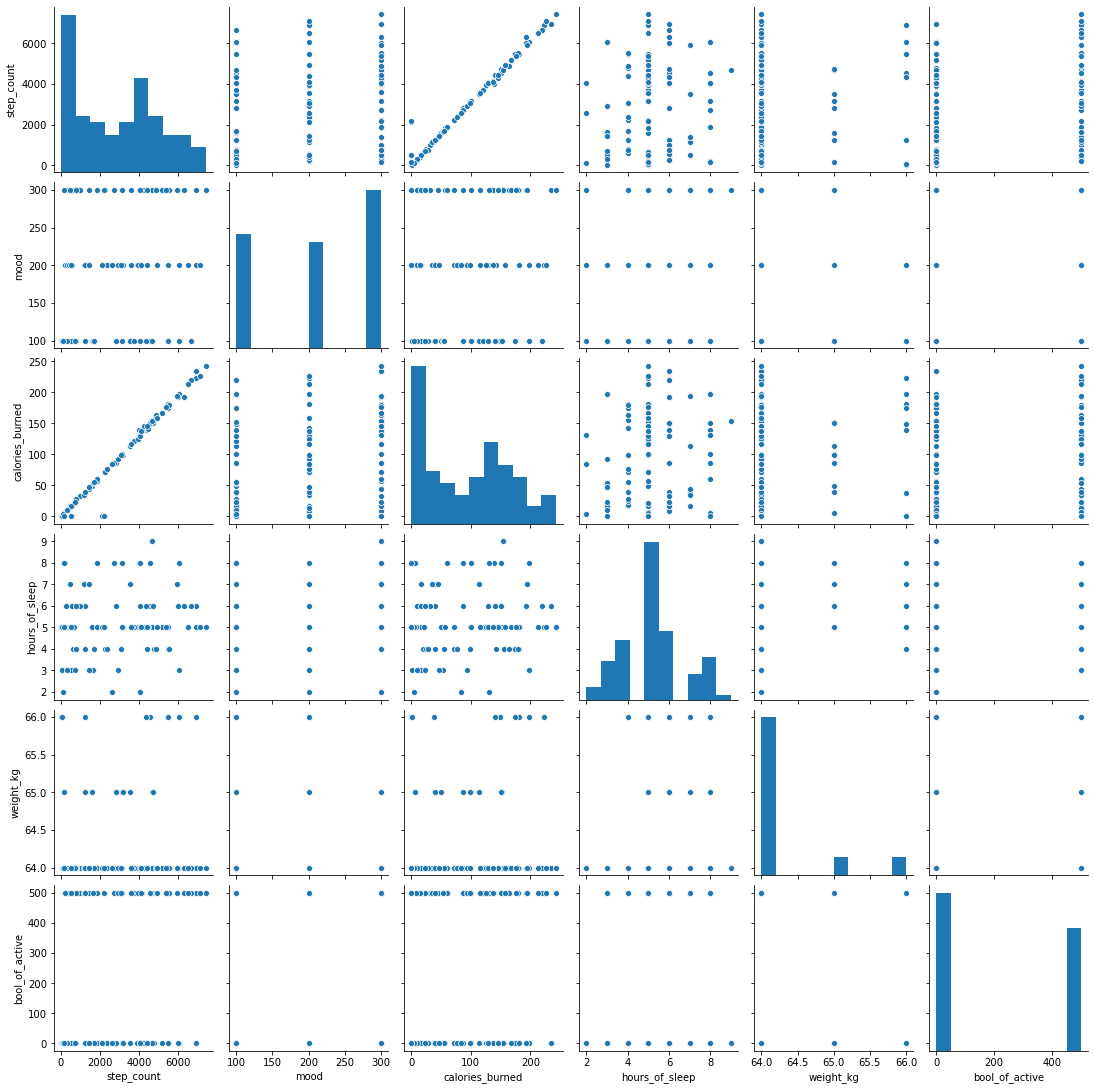

In [13]:
sb.pairplot(df)

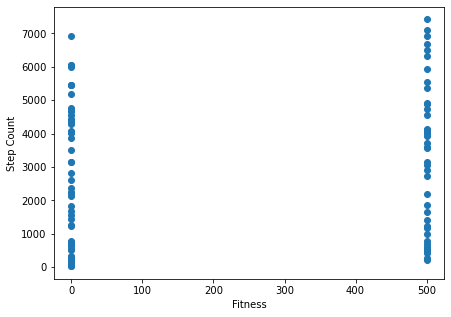

In [14]:
#scatter plot
plt.figure(figsize=(7,5))        #size of the figure
plt.scatter(df['bool_of_active'],df['step_count'])  
plt.xlabel("Fitness")
plt.ylabel("Step Count")
plt.show()

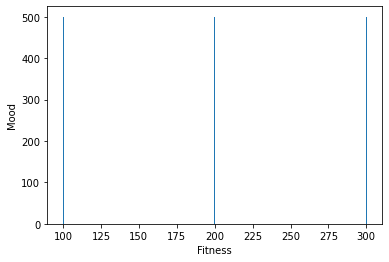

In [15]:
#bar plot
plt.bar(df['mood'], df['bool_of_active'], width=0.8)
plt.xlabel("Fitness")
plt.ylabel("Mood")
plt.show()

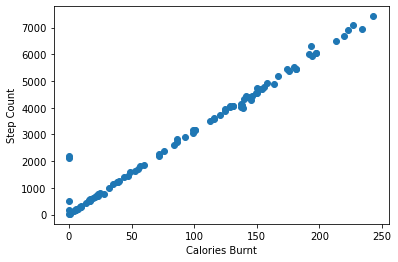

In [16]:
plt.scatter(df['calories_burned'], df['step_count'])
plt.xlabel("Calories Burnt")
plt.ylabel("Step Count")
plt.show()

### Analyzing the output column of the dataset

In [17]:
correlation = df.corr()
correlation

,step_count,mood,calories_burned,hours_of_sleep,weight_kg,bool_of_active
step_count,1.000000,0.246738,0.989260,0.080687,0.109404,0.120212
mood,0.246738,1.000000,0.235044,0.210417,-0.458776,0.379646
calories_burned,0.989260,0.235044,1.000000,0.080726,0.112200,0.110900
hours_of_sleep,0.080687,0.210417,0.080726,1.000000,0.189118,0.136603
weight_kg,0.109404,-0.458776,0.112200,0.189118,1.000000,-0.296443
bool_of_active,0.120212,0.379646,0.110900,0.136603,-0.296443,1.000000


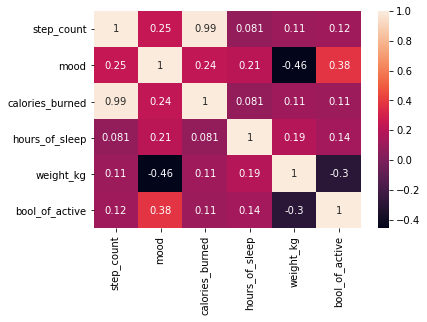

In [18]:
sb.heatmap(correlation, annot=True)